# Optimization for Machine Learning, lecture 1 - 15/01/2021

In [1]:
from IPython.display import Image

### Definition

Machine learning is about deriving rules from inputs/dataset (learn knowledge from a dataset); Algorithm that maps a dataset to a set of prior unknown rules.

> ML converts experience in expertise/knowledge based on a dataset
> 
> **ML** $\rightarrow$ *Apprentissage automatique* (in French, or *Apprentissage Machine*)

The expectation of training a model is to have a small error in production.

### Supervised learning

> $S=\{(x_i,y_i), i \in \{1, ..., n\}\}$ with $x_i$ either a categorical (classification) or continuous (regression) variable/feature.

**loss in regression**: $l(h, (x,y)) = (h(x) -y)^2$

**loss in classification**: $l(h,(x,y)=\mathbb{1}(h(x)\neq y) = 1$ if $h(x)\neq y$ or $= 0$ if $h(x)=y$ (however not continuous/derivable)

### Unsupervised learning

> $S=\{(z_i), i \in \{1, ..., n\}\}$

We talk about **clustering**. We want to figure out something without a ground truth. 

### Reinforcement learning

*Close to supervised learning*. Kind of supervised learning where the learning is performed with regards to a reward function. 

> $h: x \rightarrow y$

### Evaluating a predictor

Tomorrow: $(x,y) \rightsquigarrow D$

We want to minimize $\underset{(x,y) \rightsquigarrow D}{E}[l(h,(x,y))]$ (expected value of the loss when in the future point we are looking at data from the distribution D)

**Optimization problem**

> $\underset{(x,y) \rightsquigarrow D}{E}[l(h,(x,y))]$ provides two values (expected loss: $L_D(h)$ and $R(h)$

We want to find a good predictor to solve and optimize a problem.

> minimize $R(h) = \underset{(x,y) \rightsquigarrow D}{E}[l(h,(x,y))]$ with $D$ unknown
>
> Machine Learning is "distribution free". The algorithm of a ML process is independent from a distribution

ML assumes S is drawn independently from D

> $\frac{1}{n}\underset{i=1}{\overset{n}{\sum}}l(h,(x_i,y_i)) \approx \underset{(x,y) \rightsquigarrow D}{E}[l(h,(x,y))]$ closer as $n \rightarrow \infty$
>
> Empirical Loss/Risk: $L_s(h)/R_s(h)$

### ML considers the following Problem:

We would like to work on the expected risk but we only have the empirical risk.

> $\underset{h\in H}{minimize}\,R_S(h) = \frac{1}{n}\underset{i=1}{\overset{n}{\sum}}l(h,(x_i,y_i))$

We want to choose between different families of models $H_1$, $H_2$, etc. with $H_1 \subset H_2$. Ex. $H_1$ linear models, $H_2$ quadratic models

> $H_1 \in \underset{h\in H_1}{argmin} R_S(h)$
> 
> $H_2 \in \underset{h\in H_2}{argmin} R_S(h)$
>
> with assumption: $R_S(h_2) \le R_S(h_1)$

We face the **problem of overfitting**. It may be that $R_S(h_2) \gt R_S(h_1)$

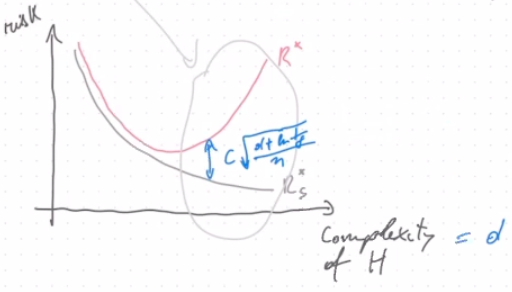

In [8]:
Image('pictures/overfitting.png', width=600)

| Statistics | ML | |
| :-- | :-- | :-- |
| Asymptotic results | finite sample size |  |

> Statistics: $\underset{|S|=n\rightarrow\infty}{R_S(h)} \approx R(h)$ 
> 
> ML: $|R_S(h)-R(h)| \le c*\sqrt{\frac{1+ln(1/d)}{n}}$ with probability $1-\delta$ with $\delta = vc - dim(H)$. It quantifies the complexity of the class of predictions for uni-dimensional polynomials

$\delta$ is equal to the number of coefficients of the polynomial.

$R(h) \approx R_S(h) + c*\sqrt{\frac{1+ln(1/d)}{n}}$

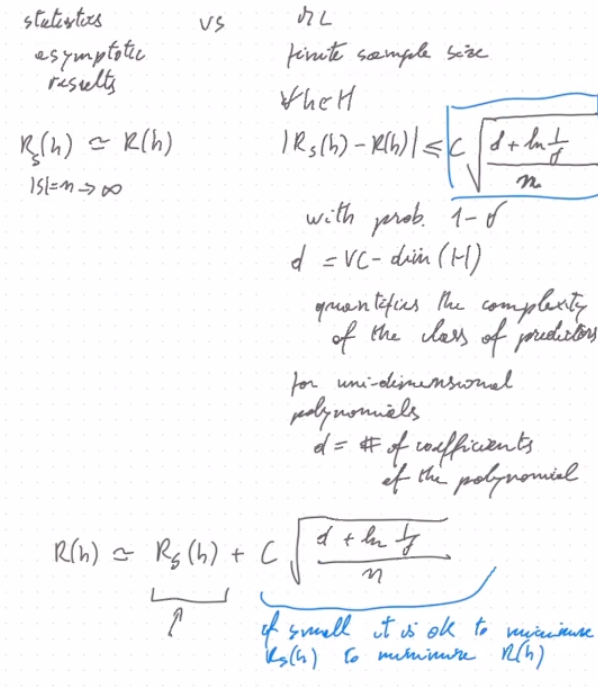

In [9]:
Image('pictures/statsvml.png', width=600)

$c*\sqrt{\frac{1+ln(1/d)}{n}}$ can be thought of as a **regularization term** that penalizes complexity.

### Regularization Term

> minimize $R_S(h) + l||h||^2$

We want to restrict the amount of models considered. However, the above is a *loose bound*.

**In practice**, we split the ensemble $S$ between a training and validation part $S_t$ and $S_v$. We would minimize the error over $S_t$

To pick between two:

- $h^\ast_1 \in \underset{h\in H_1}{argmin}\,R_{S_t}(h)$
- $h^\ast_2 \in \underset{h\in H_2}{argmin}\,R_{S_t}(h)$

with $R_{S_t}(h^\ast_1) \ge R_{S_t}(h^\ast_2)$

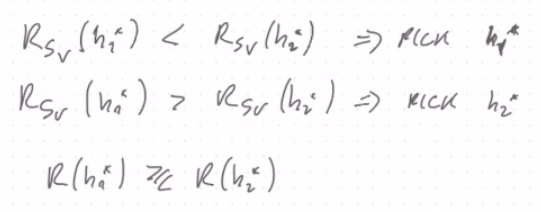

In [10]:
Image('pictures/validation.png', width=600)

We approximate:

> $R(h^\ast_1) \overset{?}{\lesseqqgtr} R(h^\ast_2)$

- $R(h^\ast_1) \approx R_{S_v}(h^\ast_1)$
- $R(h^\ast_2) \approx R_{S_v}(h^\ast_2)$

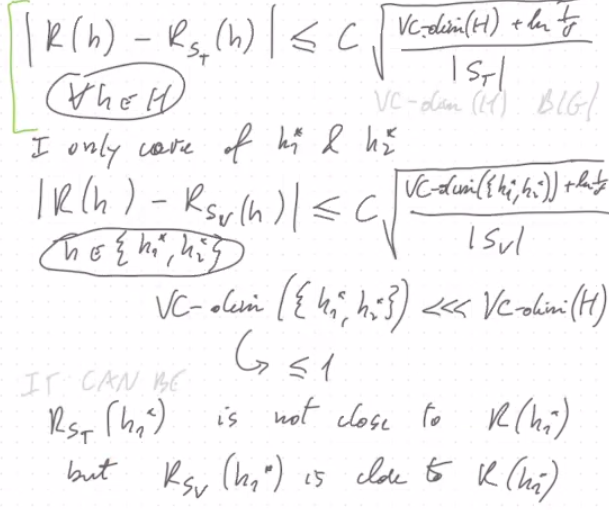

In [12]:
Image('pictures/vapnik.png', width=600)

$R_{S_t}(h^\ast_1)$ is not close to $R(h^\ast_1)$ but $R_{S_v}(h^\ast_1)$ is not close to $R(h^\ast_1)$

### K-Fold Cross-Validation

$S$ is split in $K$ blocks $\{S_1, S_2, ..., S_k\}$ with $k_1 \in \underset{}{argmin} R_{S_2 \cup ... \cup S_k}(h)$

Validation: $\frac{1}{k}\underset{i=1}{\overset{k}{\sum}}R_{S_i}(h_i)$

k-crossfold validation implies **solving k optimization problems**.

## Hyperparameters

Parameters that are outside the models, they set the optimization problem: *parameters of the algorithm used to learn the model*. Examples:

- learning rate
- parameters of the grid search
- batch size

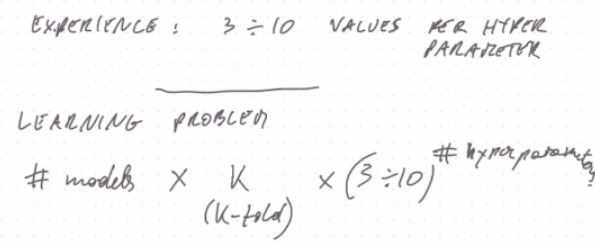

In [13]:
Image('pictures/hyperparams.png', width=600)